In [166]:
# Linear Regression using Batch Gradient Descent methods.

# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [315]:
# N - Number of samples
# D - Number of features

def sample_data_generation(N,D):
    np.random.seed(1)
    X = np.random.randn(N,D)
    y_target = 2 + (3 * X) + np.random.randn(N,1)
#   Data split (60%/40%)
    t_s = int(X.shape[0] * .6)
    tst_s = int(X.shape[0] * .4)
    X_train = X[:t_s,:]
    y_train = y[:t_s,:]
    X_test = X[t_s:,:]
    y_test = y[t_s:,:]
    X_train_b = np.c_[np.ones((t_s,1)),X_train]  # Adding 1s for the bias term
    X_test_b = np.c_[np.ones((tst_s,1)),X_test]
    return X_train,X_train_b, y_train,X_test,X_test_b,y_test

def weights_initialization(X):
    np.random.seed(1)
    weights = np.random.randn(X.shape[1],1)
    return weights

def train_lr(X,y,weights,epochs,learning_rate):
    m = X.shape[0]
    cost = []
    weight_stack = []
    error = 0.0
    for epoch in range(epochs):
        error = np.dot(X,weights) - y
        gradients = (2/m) * np.dot(X.T,error)
        weights = weights - learning_rate * gradients
        loss = (1/m)*(np.sum(error)**2)
        cost.append(loss)
        weight_stack.append(list(weights[1])) # storing 1 weight parameter for plotting graph.
    return weights,cost,weight_stack
    

In [316]:
X_train,X_train_b,y_train,X_test, X_test_b,y_test = sample_data_generation(100,1)

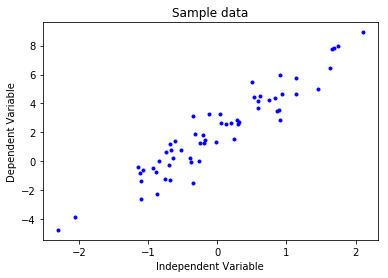

In [317]:
plt.plot(X_train,y_train,'b.')
plt.title("Sample data")
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

In [318]:
w = weights_initialization(X_train_b)

In [319]:
weights,cost,weight_s = train_lr(X_train_b,y_train,w,100,0.1)

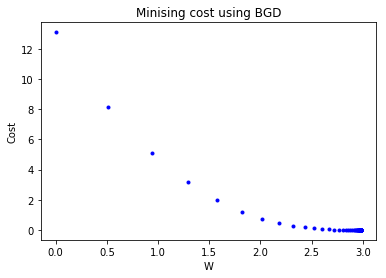

In [320]:
plt.plot(weight_s,cost,'b.')
plt.title("Minising cost using BGD")
plt.xlabel('W')
plt.ylabel("Cost")
plt.show()

In [324]:
weights

array([[2.0617692 ],
       [2.97743862]])

In [322]:
y_predict = np.dot(X_test_b,weights)

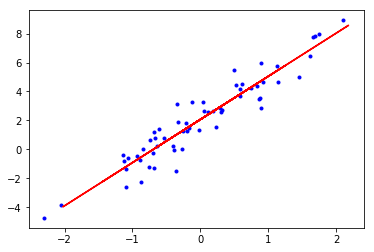

In [323]:
plt.plot(X_train,y_train,'b.')
plt.plot(X_test,y_predict,'r-',)
# plt.axis([0,1,0,10])
plt.show()